In [1]:
# Python Assignment- Daniel Moraes

### Due: 1 May 2024

In [2]:
######################## Python Translate Script ########################

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [3]:
## 1 ##
## Dr. X: this gets sequences
# Here is an example to get sequences for Eudyptes chrysocome specie. 
# This can be applied for all penguins species or for one or a group of penguins species. 
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

# Adding sequence for "Eudyptes chrysocome" to cytb_seqs
penguins = "Eudyptes chrysocome"
penguins_sequence = cytb_seqs.get(penguins, None)
print(f"Sequence for {penguins}: {penguins_sequence}")

Sequence for Eudyptes chrysocome: ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCCCTAATCGACCTACCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTGGGCATCTGCCTAGCTACACAAATCCTAACCGGCCTCTTACTAGCTGCCCACTACACCGCAGACACCACCTTAGCCTTCTCCTCCGTCGCCCATACATGCCGAAATGTACAATACGGCTGATTAATCCGCAATCTACACGCAAACGGGGCCTCATTCTTCTTCATCTGCATCTACCTCCACATCGGTCGCGGACTCTACTACGGCTCCTACCTGTACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATAGCAACCGCCTTCGTAGGCTATGTCCTACCATGAGGTCAGATATCCTTCTGAGGGGCCACAGTCATCACCAACCTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAGTGGGCCTGAGGCGGCTTCTCAGTAGACAACCCCACACTAACCCGATTCTTCACACTACACTTCCTTCTCCCCTTCATAATCGCAGGCCTCACCTTAATCCACCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCCCTAGGCATCGTAGCCAACTCCGACAAAATCCCATTCCACCCCTACTACTCTACAAAAGATATCCTAGGATTTATCCTCCTACTCCTTCCACTAACAACCCTTGCCCTATTCTCACCCAACTTGCTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCCCTAGTCACACCCCCACATATCAAACCAGAGTGGTACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGAGGAGTCCTAGCCCTAGCAGCATCAGTACTAATCCTGTTCCTAATCCCCCTCCTCCACAAATCCAAGCAGCGCACAATAACCTTCCGCCCCCTCTCC

In [4]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
# Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
from Bio.Data import CodonTable

def translate_sequences(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""  # aa_seq_string being initiated
    for myl in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[myl:myl + 3]
        if codon in mito_table.stop_codons:
            break
        aa_seq_string += mito_table.forward_table[codon]
    return aa_seq_string
# here is one example: 
dna_sequence = "ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCTCCTCCTAG"
translated_sequence = translate_sequences(dna_sequence)
print(translated_sequence)

MAPNLRKSHPLLKMINNSSS


In [5]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
from Bio.Seq import Seq

def biopythonTranslate(nucl_seq):
    coding_dna = Seq(nucl_seq)
    aa_string = coding_dna.translate()
    return aa_string
# Test the function with the same example from question #2
dna_sequence = "ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCTCCTCCTAG"
translated_sequence = translate_sequences(dna_sequence)
print(translated_sequence)
# This way is a better way to code and get the same result

MAPNLRKSHPLLKMINNSSS


In [6]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########

In [46]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    molecular_weight = analysed_seq.molecular_weight()
    return  molecular_weight
compute_molecular_weight("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCTCCTCCTAG")

5627.7016

In [8]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [110]:
from Bio.Seq import Seq
def gc_content(nucl_seq):
    seq = Seq(nucl_seq)
    return (seq.count("G") + seq.count("C")) / len(seq)
# Test the function to get the GC-content (proportion of "G" and "C")
nucl_sequence = "ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCTCCTCCTAGC"
GC_content = gc_content(nucl_sequence)
print(GC_content)

0.4375


#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [70]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

In [71]:
penguins_df['molecular_weight']='NaN' 
penguins_df['GC_content'] = 'NaN' 
print(penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


In [72]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above


In [74]:
for key, value in cytb_seqs.items():
    aa_seq = translate_sequences(str(value)) #translate the nucleotide sequence to an amino acid sequence
    molecular_weight = compute_molecular_weight(aa_seq) #calculate molecular weight of amino acid sequence
    gcContent = gc_content(value) #calculate GC content of nucleotide squence
    penguins_df.loc[penguins_df.species == key,'molecular_weight'] = molecular_weight #update molecular_weight value of current species
    penguins_df.loc[penguins_df.species == key,'GC_content'] = gcContent #update GC_content value of current species
    
print (penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021   0.483815
1   Aptenodytes patagonicus  13.40       42563.7067   0.496938
2       Eudyptes chrysocome   2.80       42475.5753   0.511811
3     Eudyptes chrysolophus   4.50       42445.5493   0.509186
4         Eudyptes sclateri   4.25       42475.5753   0.508311
5           Eudyptula minor   1.60       42491.6408   0.492563
6        Pygoscelis adeliae   4.60        42458.614   0.490814
7     Pygoscelis antarctica   4.10       42404.5423    0.47769
8          Pygoscelis papua   6.10       42595.8759   0.471566
9       Spheniscus demersus   3.20        42431.549    0.48294
10     Spheniscus humboldti   4.75        42399.552   0.492563
11  Spheniscus magellanicus   3.40       42459.6021   0.482065


In [100]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.

In [101]:
#import matplotlib, seaborn and numpy for plotting purposes

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

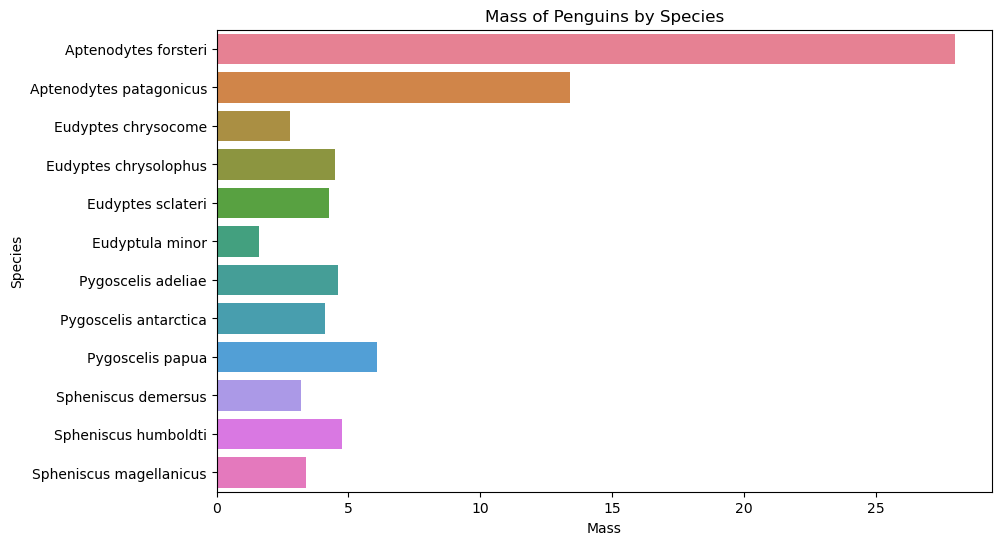

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(x="mass", y="species", hue="species", data=penguins_df, dodge=False)
plt.xlabel("Mass")
plt.ylabel("Species")
plt.title("Mass of Penguins by Species")
plt.show()

In [103]:
## *Q1* What is the smallest penguin species? 
# It is the specie called Eudyptula minor
## *Q2* What is the geographical range of this species?
# Eudyptula minor are the smallest living penguins and are found only in Australia (often called fairy penguins) and New Zealand (often called little blue or blue penguins). Source:https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/eudyptula-minor

In [104]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

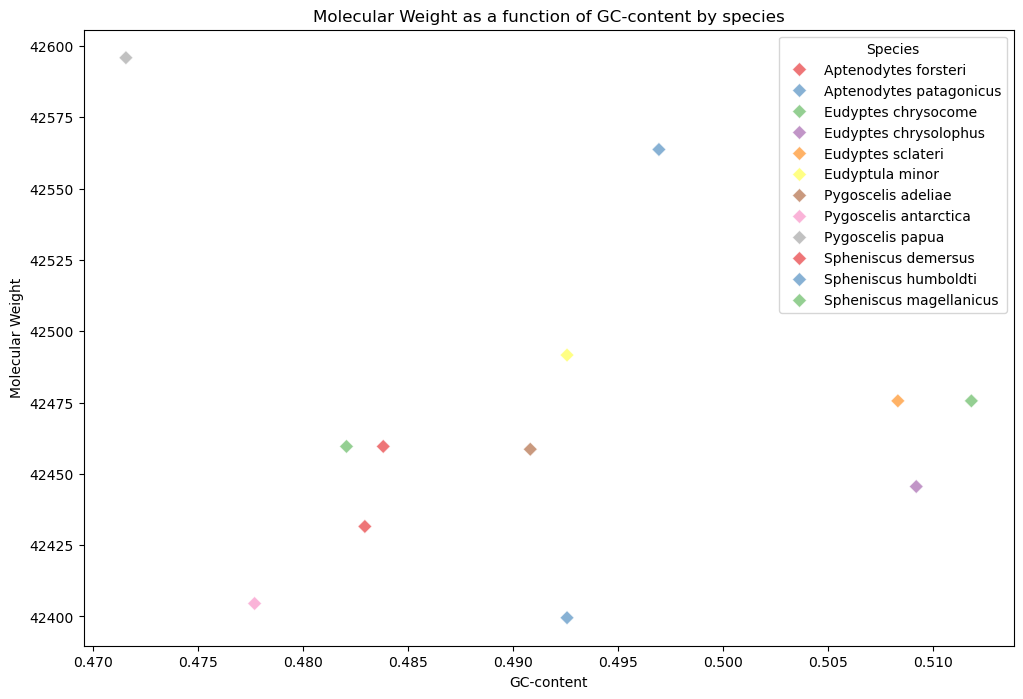

In [105]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="GC_content", y="molecular_weight", data=penguins_df, hue='species', 
                palette='Set1', alpha=0.6, s=50, marker='D')
plt.xlabel("GC-content")
plt.ylabel("Molecular Weight")
plt.title("Molecular Weight as a function of GC-content by species")
plt.legend(title='Species')
plt.grid(False)
plt.show()

In [106]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [107]:
penguins_df.to_csv("penguins_mass_cytb.csv", encoding='utf-8', index=False)

In [108]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

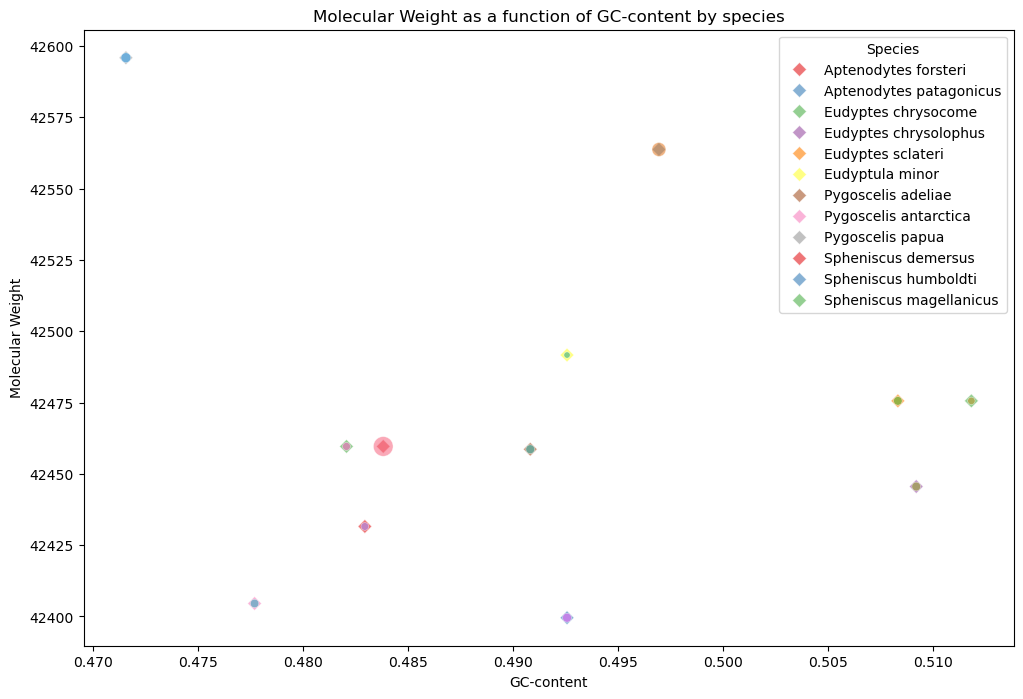

In [109]:
# Bonus: Plot a visualization of the Mass (y-axis) as a function of GC-content (x-axis) by species.
# Plot
plt.figure(figsize=(12, 8))

# Scatter plot with GC content and molecular weight
sns.scatterplot(x="GC_content", y="molecular_weight", data=penguins_df, hue='species', 
                palette='Set1', alpha=0.6, s=50, marker='D')

# Add mass as size of the points
sns.scatterplot(x="GC_content", y="molecular_weight", data=penguins_df, hue='species', 
                size="mass", sizes=(20, 200), alpha=0.6, legend=False, marker='o')
plt.xlabel("GC-content")
plt.ylabel("Molecular Weight")
plt.title("Molecular Weight as a function of GC-content by species")
plt.legend(title='Species')